##  


**1. Why is it generally preferable to use a Logistic Regression classifier rather than a classical Perceptron (i.e., a single layer of linear threshold units trained using the Perceptron training algorithm)? How can you tweak a Perceptron to make it equivalent to a Logistic Regression classifier?** 

- Ans : Classical Perceptron Layers do not perform well for data which are not linearly seperable. This network is unable to understand the complex patterns in data, hence do not produce correct ouputs. Moreover, Preceptron produces binary outputs which may not be suitable for classification tasks. Hence, Logistic Regression Classifier is preferred more than classical Perceptron. 

     To make a Preceptron equivalent to a Logistic Regression Classifier, instead of heavy side function one can use sigmoid type function to get the outputs. Along with this one can also use the 'log-loss' as the loss function. Or one may stack multiple Preceptrons to make it more like Logistic Regression Classifier. 




**2. Why was the logistic activation function a key ingredient in training the first MLPs?** 

- Ans : Logistic Activation plays a very important role in training of MLPs. For fruitful training the backpropagation rigourously uses the Gradient Descent Algorithm. For this, the derivative of the activation function needs to be existed. In case of heavy side step function which was a very important part of Perceptron and also MLPs, has a flat segment with no derivative to work with. On the other hand if we look at the logistic activation function, we can see that this function varies smoothly from 0 to 1 and also non-zero derivative exists at every point. Hence, logistic activation function is a key ingredient in training the first MLPs. 



**3. Name three popular activation functions. Can you draw them?** 

- Ans : Three popular activation functions are : 
    - Sigmoid 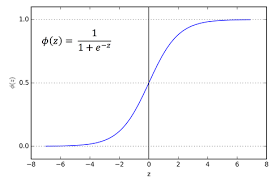 
    
    - Tanh 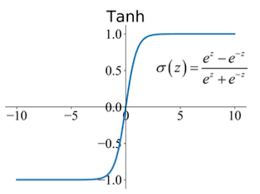 
    
    - ReLU 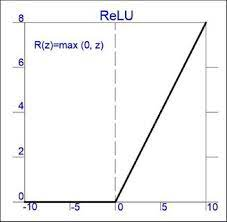

**4. Suppose you have an MLP composed of one input layer with 10 passthrough neurons, followed by one hidden layer with 50 artificial neurons, and finally one output layer with 3 artificial neurons. All artificial neurons use the ReLU activation function.   
    •	What is the shape of the input matrix X?   
    •	What about the shape of the hidden layer’s weight vector Wh, and the shape of its bias vector bh?    
    •	What is the shape of the output layer’s weight vector Wo, and its bias vector bo?  
    •	What is the shape of the network’s output matrix Y?  
    •	Write the equation that computes the network’s output matrix Y as a function of X, Wh, bh, Wo and bo.**
    
    
- Ans : These are the answers : 
    - Shape of the input matrix $X$ : (10,1)
    
    - Shape of hidden layer's weight $W_h$ = (10,50), Shape of bias vector $b_h$ = (50,1)
        
    - Shape of output layer's weight vector $W_o$ = (50,3). Shape of its bias vector $b_o$ = (3,1)
    
    - Shape of network's output matrix $Y$ = (3,1)
    
    - The equation will be : $Y_I =  ReLU({W_h}^{T}. X + b_h)$, $Y_I$ is the output from the hidden layer (with shape (50,1)) which will act as input for the output layer. Finally the output will be $Y = ReLU({W_o}^{T} . Y_I + b_o)$



    
    
**5. How many neurons do you need in the output layer if you want to classify email into spam or ham? What activation function should you use in the output layer? If instead you want to tackle MNIST, how many neurons do you need in the output layer, using what activation function?** 


- Ans : 
    - If we want to classify email to spam or ham we need 1 neuron in the output layer. 
    
    - In this case we should use 'Sigmoid' activation function in the output layer. 
    
    - In case of MNIST data we will be needing 10 neurons in the output layer and we should use 'Softmax' activation function. 




**6. What is backpropagation and how does it work? What is the difference between backpropagation and reverse-mode autodiff?**

- Ans : Backpropagation is used to train the neural network by updating the weights and biases. It uses the Gradient Descent approach to minimize the cost function with respect to the parameters of the network. 

  Backpropagation refers to the whole process of training an artificial neural network using multiple backpropagation steps, each of which computes gradients and uses them to perform a Gradient Descent step. In contrast, reverse-mode auto diff is simply a technique used to compute gradients efficiently and it happens to be used by backpropagation.



**7. Can you list all the hyperparameters you can tweak in an MLP? If the MLP overfits the training data, how could you tweak these hyperparameters to try to solve the problem?**  


- Ans : There are several hyperparameters in MLP. 
    - Number of neurons in hidden layers. 
    - Number of hidden layers. 
    - Activation functions in hidden layers. 
    - Learning rate.
    - Optimizers. 
    - Batch Size. 
    - Number of epochs. 
    - Early Stopping.
    - Regularization. 


    If the MLP overfits the data, that means, the model is taking up the noise from data too. So, we need to make the model a bit simpler or use penalties so that the noise does not effect. There are several hyperparameters to perform this. 
    - Regularization
    - Dropout layers
    - Early Stopping 
    - Reducing the number of hidden layers 
    - Reducing the number of neurons in the hidden layers
    - Increasing the batch size of training data. 


**8. Train a deep MLP on the MNIST dataset and see if you can get over 98% precision. Try adding all the bells and whistles (i.e., save checkpoints, restore the last checkpoint in case of an interruption, add summaries, plot learning curves using TensorBoard, and so on).** 


In [1]:
#!pip install tensorflow

In [2]:
#! pip install tensorboard

In [3]:
# Importing libraries
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
import datetime

In [4]:
# Loading the data
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
print(f'Number of training images : {len(train_images)}')
print(f'Number of test images : {len(test_images)}')

Number of training images : 60000
Number of test images : 10000


In [7]:
# Preprocess the data
train_images = train_images / 255.0
test_images = test_images / 255.0
train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)


In [8]:
# splitting in train and validation sets

train_images1 = train_images[:40000]
train_labels1 = train_labels[:40000]


val_images = train_images[40000:]
val_labels = train_labels[40000:]

In [9]:
# Model building 
model = keras.Sequential()
model.add(Flatten(input_shape = (28,28)))
#model.add(Dense(784, activation = 'relu'))
#model.add(Dropout(0.2))
#model.add(Dense(512, activation = 'relu'))
#model.add(Dropout(0.2))
#model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))
          

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
# Save checkpoints
import os 
checkpoint_path = "model_assign13_weights.h5"
earlystopping = EarlyStopping(monitor = 'val_loss', 
                              patience = 5,
                              verbose = 1, 
                              restore_best_weights = True, 
                             )
cp = ModelCheckpoint(filepath=checkpoint_path,
                     save_weights_only=True, 
                     verbose=1)

log_dir = os.path.join("logs_assign13/log", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tb = TensorBoard(log_dir=log_dir, histogram_freq=1)

callback = [earlystopping, cp, tb]

In [13]:
history = model.fit(train_images1, train_labels1, 
          epochs=50, 
          batch_size=32, 
          validation_data=(val_images, val_labels),
          callbacks = callback)

Epoch 1/50


1242/1250 [============================>.] - ETA: 0s - loss: 0.3517 - accuracy: 0.8974
Epoch 1: saving model to model_assign13_weights.h5
1250/1250 [==============================] - 12s 8ms/step - loss: 0.3510 - accuracy: 0.8976 - val_loss: 0.1823 - val_accuracy: 0.9473
Epoch 2/50
1243/1250 [============================>.] - ETA: 0s - loss: 0.1726 - accuracy: 0.9495
Epoch 2: saving model to model_assign13_weights.h5
1250/1250 [==============================] - 9s 7ms/step - loss: 0.1729 - accuracy: 0.9494 - val_loss: 0.1382 - val_accuracy: 0.9578
Epoch 3/50
1244/1250 [============================>.] - ETA: 0s - loss: 0.1269 - accuracy: 0.9612
Epoch 3: saving model to model_assign13_weights.h5
1250/1250 [==============================] - 10s 8ms/step - loss: 0.1267 - accuracy: 0.9613 - val_loss: 0.1191 - val_accuracy: 0.9656
Epoch 4/50
1243/1250 [============================>.] - ETA: 0s - loss: 0.1037 - accuracy: 0.9691
Epoch 4: saving model to model_assign13_weights.h5
1

<Axes: >

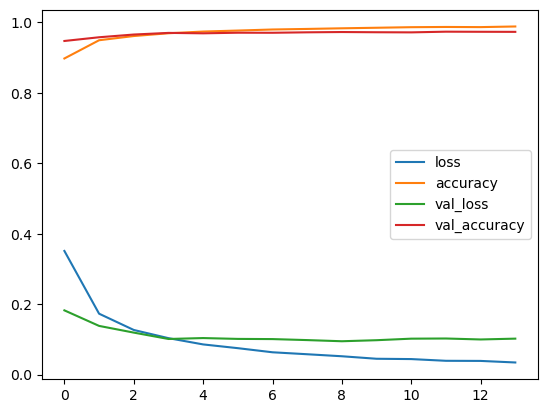

In [14]:
history_df = pd.DataFrame(history.history)

history_df.plot()

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0756 - accuracy: 0.9793
Test accuracy: 0.9793000221252441
